## Yansong's Code

The following 2 cells import the necessary packages and change the size of the graph for the graphs.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [10, 7]

Essentially this cell and all the following code of the same format creates the api call, in the format of https://api.census.gov/data/2018/abscs?get=NAME,GEO_ID,NAICS2017_LABEL,SEX,ETH_GROUP,RACE_GROUP,VET_GROUP,FIRMPDEMP&for=us:*&NAICS2017=00&key=YOUR_KEY_GOES_HERE

In [3]:
# BUILDING BASE URL
url = 'https://api.census.gov/data'
year = '2018'
dataset = 'abstcb' # CHANGE THIS TO CHANGE DATASET
base_url = '/'.join([url, year, dataset])

# FORMATTING API REQUEST
predicates = {}
get_vars = ['FIRMPDEMP', 'MOTUSETECH', 'MOTUSETECH_LABEL'] # CHANGE THIS TO CHANGE VARIABLES RECEIVED
predicates['get'] = ','.join(get_vars)
predicates['for'] = 'us:*' # CHANGE THIS TO CHANGE GEOGRAPHIC SCOPE
predicates['key'] = '7c2c8ae1aefce7823680175cfa25d0ba300fe6f5' # DON'T CHANGE THIS

r = requests.get(base_url, params=predicates)
r

<Response [200]>

This creates a pandas dataframe using the relevant data from the api call, ie r.json()[1:] which ignores the first row of data which includes the data headers, and then removes any rows which have totals of the descriptive data, in this case MOTUSETECH_LABEL, in comparison to the number of firms FIRMPDEMP.

In [4]:
df = pd.DataFrame(columns=r.json()[0], data = r.json()[1:])
df["FIRMPDEMP"] = pd.to_numeric(df["FIRMPDEMP"])
df = df[df["MOTUSETECH_LABEL"].str.contains("Total")==False]

df = df.sort_values(by=['FIRMPDEMP'], ascending=False)
df

,FIRMPDEMP,MOTUSETECH,MOTUSETECH_LABEL,us
16,926204,T3E10C03,Specialized Software: To improve quality or re...,1
15,791273,T3E10C02,Specialized Software: To upgrade outdated proc...,1
9,763069,T2E07C03,Cloud-Based: To improve quality or reliability...,1
8,670804,T2E07C02,Cloud-Based: To upgrade outdated processes or ...,1
30,437117,T5E16C03,Specialized Equipment: To improve quality or r...,1
12,364624,T2E07C06,Cloud-Based: Some other reason,1
14,360169,T3E10C01,Specialized Software: To automate tasks perfor...,1
19,353493,T3E10C06,Specialized Software: Some other reason,1
29,330009,T5E16C02,Specialized Equipment: To upgrade outdated pro...,1
17,278651,T3E10C04,Specialized Software: To expand the range of g...,1


These cells create a version of the dataframe from earlier in a format which can be converted into a graph, after converting the number of firms columns from a string into series of ints In addition, it sets the seaborn formatting to make the graph have a lined background, and inverts the plot to be ordered from highest to lowest number of firms along with applying the appropriate titles and labels to the graph.

In [5]:
temp = df.groupby(['MOTUSETECH_LABEL']).agg({'FIRMPDEMP':'sum'})
temp = pd.to_numeric(temp['FIRMPDEMP'])
temp = temp.sort_values(ascending=False)

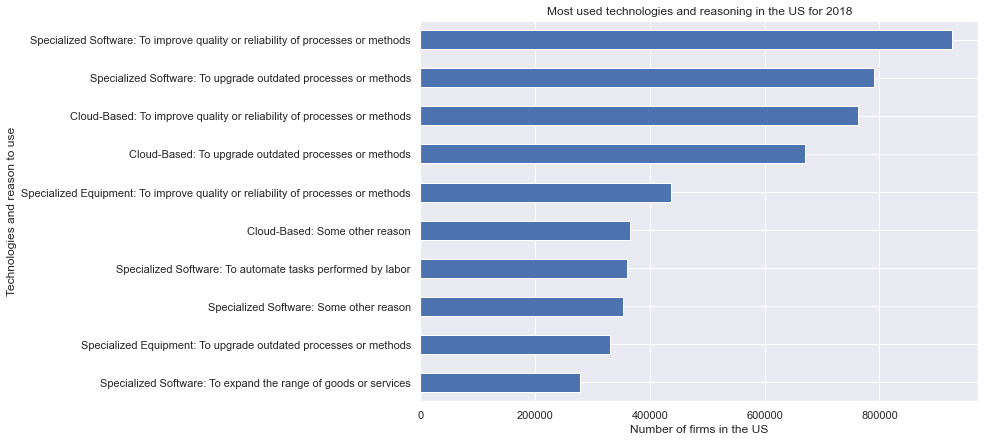

In [6]:
sns.set()
ax = temp[:10].plot(x='FIRMPDEMP', kind="barh")
sns.set(style="ticks")
plt.title('Most used technologies and reasoning in the US for 2018')
plt.xlabel('Number of firms in the US')
plt.ylabel('Technologies and reason to use')
plt.gca().invert_yaxis()
plt.show()

From here one, the 2 graphs are formed in the same way that the one above was, with the only difference being that they call different fields from the census API, in this case being 'MOTPRODTECH', 'MOTPRODTECH_LABEL'.

In [7]:
# BUILDING BASE URL
url = 'https://api.census.gov/data'
year = '2018'
dataset = 'abstcb' # CHANGE THIS TO CHANGE DATASET
base_url = '/'.join([url, year, dataset])

# FORMATTING API REQUEST
predicates = {}
get_vars = ['FIRMPDEMP', 'MOTPRODTECH', 'MOTPRODTECH_LABEL'] # CHANGE THIS TO CHANGE VARIABLES RECEIVED
predicates['get'] = ','.join(get_vars)
predicates['for'] = 'us:*' # CHANGE THIS TO CHANGE GEOGRAPHIC SCOPE
predicates['key'] = '7c2c8ae1aefce7823680175cfa25d0ba300fe6f5' # DON'T CHANGE THIS

r = requests.get(base_url, params=predicates)
r

<Response [200]>

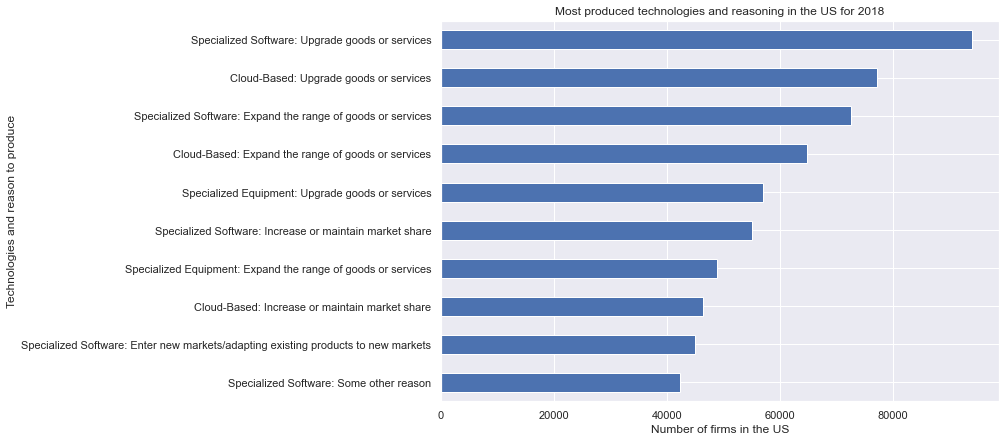

In [8]:
df = pd.DataFrame(columns=r.json()[0], data = r.json()[1:])
df["FIRMPDEMP"] = pd.to_numeric(df["FIRMPDEMP"])
df = df[df["MOTPRODTECH_LABEL"].str.contains("Total")==False]
df = df.sort_values(by=['FIRMPDEMP'], ascending=False)

temp = df.groupby(['MOTPRODTECH_LABEL']).agg({'FIRMPDEMP':'sum'})
temp = pd.to_numeric(temp['FIRMPDEMP'])
temp = temp.sort_values(ascending=False)

sns.set()
ax = temp[:10].plot(x='FIRMPDEMP', kind="barh")
sns.set(style="ticks")
plt.title('Most produced technologies and reasoning in the US for 2018')
plt.xlabel('Number of firms in the US')
plt.ylabel('Technologies and reason to produce')
plt.gca().invert_yaxis()
plt.show()

In [12]:
# BUILDING BASE URL
url = 'https://api.census.gov/data'
year = '2018'
dataset = 'abstcb' # CHANGE THIS TO CHANGE DATASET
base_url = '/'.join([url, year, dataset])

# FORMATTING API REQUEST
predicates = {}
get_vars = ['FIRMPDEMP', 'IMPACTWF_U', 'IMPACTWF_U_LABEL'] # CHANGE THIS TO CHANGE VARIABLES RECEIVED
predicates['get'] = ','.join(get_vars)
predicates['for'] = 'us:*' # CHANGE THIS TO CHANGE GEOGRAPHIC SCOPE
predicates['key'] = '7c2c8ae1aefce7823680175cfa25d0ba300fe6f5' # DON'T CHANGE THIS

r = requests.get(base_url, params=predicates)
r

<Response [200]>

In [13]:
df = pd.DataFrame(columns=r.json()[0], data = r.json()[1:])
df["FIRMPDEMP"] = pd.to_numeric(df["FIRMPDEMP"])
df = df[df["IMPACTWF_U_LABEL"].str.contains("Total")==False]
df = df[df["IMPACTWF_U_LABEL"].str.contains("Not applicable")==False]
df = df.sort_values(by=['FIRMPDEMP'], ascending=False)

temp = df.groupby(['IMPACTWF_U_LABEL']).agg({'FIRMPDEMP':'sum'})
temp = pd.to_numeric(temp['FIRMPDEMP'])
temp = temp.sort_values(ascending=False)

#df

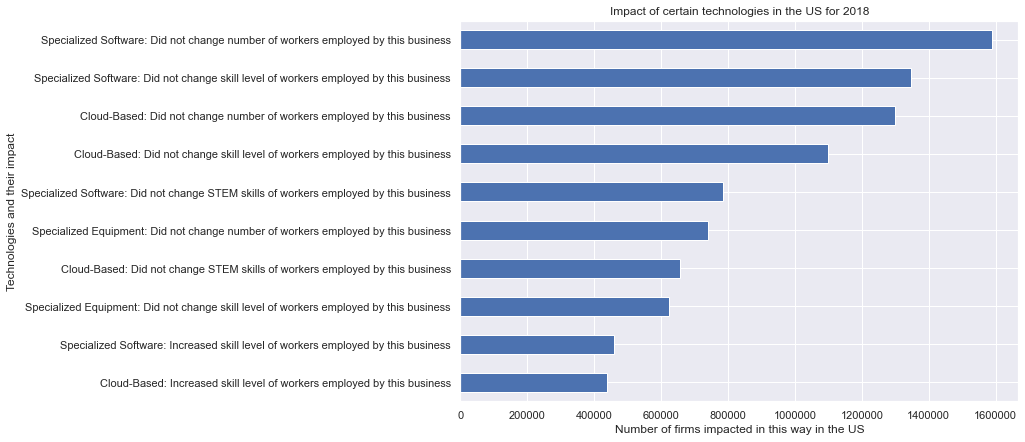

In [14]:
sns.set()
ax = temp[:10].plot(x='FIRMPDEMP', kind="barh")
ax.ticklabel_format(style='plain',  axis='x')
sns.set(style="ticks")
plt.title('Impact of certain technologies in the US for 2018')
plt.xlabel('Number of firms impacted in this way in the US')
plt.ylabel('Technologies and their impact')
plt.gca().invert_yaxis()
plt.show()

Below is an unused sample merge on arbitrarily selected data in order to fulfill the purposes of the rubric. The data is obtained and a separate dataframe is created for each of the 4 sample datasets of company summary, business characteristics, business owner characteristics and technology characteristics in the same was as earlier when creating the graphs, with only one difference in that these calls query the state datasets while the graphs are called on the total US datasets.

In [15]:
# BUILDING BASE URL
url = 'https://api.census.gov/data'
year = '2018'
dataset = 'abstcb' # CHANGE THIS TO CHANGE DATASET
base_url = '/'.join([url, year, dataset])

# FORMATTING API REQUEST
predicates = {}
get_vars = ['NAME', 'IMPACTWF_U', 'IMPACTWF_U_LABEL'] # CHANGE THIS TO CHANGE VARIABLES RECEIVED
predicates['get'] = ','.join(get_vars)
predicates['for'] = 'state:*' # CHANGE THIS TO CHANGE GEOGRAPHIC SCOPE
predicates['key'] = '7c2c8ae1aefce7823680175cfa25d0ba300fe6f5' # DON'T CHANGE THIS

r = requests.get(base_url, params=predicates)
tech_df = pd.DataFrame(columns=r.json()[0], data = r.json()[1:])
#tech_df

In [16]:
# BUILDING BASE URL
url = 'https://api.census.gov/data'
year = '2018'
dataset = 'abscbo' # CHANGE THIS TO CHANGE DATASET
base_url = '/'.join([url, year, dataset])

# FORMATTING API REQUEST
predicates = {}
get_vars = ['NAME', 'OWNER_RACE', 'OWNER_RACE_LABEL'] # CHANGE THIS TO CHANGE VARIABLES RECEIVED
predicates['get'] = ','.join(get_vars)
predicates['for'] = 'state:*' # CHANGE THIS TO CHANGE GEOGRAPHIC SCOPE
predicates['key'] = '7c2c8ae1aefce7823680175cfa25d0ba300fe6f5' # DON'T CHANGE THIS

r = requests.get(base_url, params=predicates)
owner_df = pd.DataFrame(columns=r.json()[0], data = r.json()[1:])
#owner_df


In [17]:
# BUILDING BASE URL
url = 'https://api.census.gov/data'
year = '2018'
dataset = 'abscb' # CHANGE THIS TO CHANGE DATASET
base_url = '/'.join([url, year, dataset])

# FORMATTING API REQUEST
predicates = {}
get_vars = ['NAME', 'BUSCHAR', 'BUSCHAR_LABEL'] # CHANGE THIS TO CHANGE VARIABLES RECEIVED
predicates['get'] = ','.join(get_vars)
predicates['for'] = 'state:*' # CHANGE THIS TO CHANGE GEOGRAPHIC SCOPE
predicates['key'] = '7c2c8ae1aefce7823680175cfa25d0ba300fe6f5' # DON'T CHANGE THIS

r = requests.get(base_url, params=predicates)
buschar_df = pd.DataFrame(columns=r.json()[0], data = r.json()[1:])
#buschar_df

In [18]:
# BUILDING BASE URL
url = 'https://api.census.gov/data'
year = '2018'
dataset = 'abscs' # CHANGE THIS TO CHANGE DATASET
base_url = '/'.join([url, year, dataset])

# FORMATTING API REQUEST
predicates = {}
get_vars = ['NAME', 'YIBSZFI', 'YIBSZFI_LABEL'] # CHANGE THIS TO CHANGE VARIABLES RECEIVED
predicates['get'] = ','.join(get_vars)
predicates['for'] = 'state:*' # CHANGE THIS TO CHANGE GEOGRAPHIC SCOPE
predicates['key'] = '7c2c8ae1aefce7823680175cfa25d0ba300fe6f5' # DON'T CHANGE THIS

r = requests.get(base_url, params=predicates)
sum_df = pd.DataFrame(columns=r.json()[0], data = r.json()[1:])
#sum_df

Here is the actual merge itself, where the sets are inner joined on state and the only transformation is the dropping of the state column that comes with any calls to the state datasets.

In [19]:
merged = sum_df.merge(buschar_df.drop('state', axis = 1), how='inner', on='NAME')
merged = merged.merge(owner_df.drop('state', axis = 1), how='inner', on='NAME')
merged = merged.merge(tech_df.drop('state', axis = 1), how='inner', on='NAME')
merged

,NAME,YIBSZFI,YIBSZFI_LABEL,state,BUSCHAR,BUSCHAR_LABEL,OWNER_RACE,OWNER_RACE_LABEL,IMPACTWF_U,IMPACTWF_U_LABEL
0,Mississippi,318,Firms with 2 to 3 years in business,28,A1,All firms,00,All owners of respondent firms,T1E05D01,Artificial Intelligence: Increased number of w...
1,Mississippi,318,Firms with 2 to 3 years in business,28,A1,All firms,00,All owners of respondent firms,T1E05D02,Artificial Intelligence: Decreased number of w...
2,Mississippi,318,Firms with 2 to 3 years in business,28,A1,All firms,00,All owners of respondent firms,T1E05D03,Artificial Intelligence: Did not change number...
3,Mississippi,318,Firms with 2 to 3 years in business,28,A1,All firms,00,All owners of respondent firms,T1E05D04,Artificial Intelligence: Increased skill level...
4,Mississippi,318,Firms with 2 to 3 years in business,28,A1,All firms,00,All owners of respondent firms,T1E05D05,Artificial Intelligence: Decreased skill level...
...,...,...,...,...,...,...,...,...,...,...
157075,Minnesota,323,Firms with 16 or more years in business,27,BZ,Item not reported,00,All owners of respondent firms,T3E11D10,"Specialized Software: Not applicable, did not ..."
157076,Minnesota,323,Firms with 16 or more years in business,27,BZ,Item not reported,00,All owners of respondent firms,T3E11D99,Specialized Software: Total Reporting
157077,Minnesota,323,Firms with 16 or more years in business,27,BZ,Item not reported,00,All owners of respondent firms,T4E14D01,Robotics: Increased number of workers employed...
157078,Minnesota,323,Firms with 16 or more years in business,27,BZ,Item not reported,00,All owners of respondent firms,T4E14D02,Robotics: Decreased number of workers employed...


## Mikhaela's Code

In [17]:
# imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# BUILDING BASE URL FOR TECH DATASET
url = 'https://api.census.gov/data'
year = '2018'
dataset = 'abstcb' # CHANGE THIS TO CHANGE DATASET
base_url = '/'.join([url, year, dataset])

# FORMATTING API REQUEST
predicates = {}
get_vars = ['EMP', 'ETH_GROUP', 'FACTORS_P', 'FACTORS_U', 'FACTORS_U_LABEL', 'FIRMPDEMP', 'FACTORS_P_LABEL', 'GEO_ID', 'NAICS2017', 'PAYANN', 'RCPPDEMP', 'TECHUSE', 'NAME'] # CHANGE THIS TO CHANGE VARIABLES RECEIVED
predicates['get'] = ','.join(get_vars)
predicates['for'] = 'state:*' # CHANGE THIS TO CHANGE GEOGRAPHIC SCOPE
predicates['key'] = '7c2c8ae1aefce7823680175cfa25d0ba300fe6f5' # DON'T CHANGE THIS
response = requests.get(base_url, params=predicates)

In [19]:
response.json()[0]

['EMP',
 'ETH_GROUP',
 'FACTORS_P',
 'FACTORS_U',
 'FACTORS_U_LABEL',
 'FIRMPDEMP',
 'FACTORS_P_LABEL',
 'GEO_ID',
 'NAICS2017',
 'PAYANN',
 'RCPPDEMP',
 'TECHUSE',
 'NAME',
 'state']

In [20]:
col_names = response.json()[0]

In [21]:
tech_data = pd.DataFrame(columns=col_names, data = response.json()[1:])

In [22]:
#Viewing the data
tech_data.head()

,EMP,ETH_GROUP,FACTORS_P,FACTORS_U,FACTORS_U_LABEL,FIRMPDEMP,FACTORS_P_LABEL,GEO_ID,NAICS2017,PAYANN,RCPPDEMP,TECHUSE,NAME,state
0,786873,001,00,00,All firms,17448,All firms,0400000US01,00,36136501,0,T2E03B99,Alabama,01
1,1420465,001,00,00,All firms,58136,All firms,0400000US01,00,65324725,0,T2E03BA9,Alabama,01
2,427265,001,00,00,All firms,30912,All firms,0400000US01,00,17464089,0,T3E03B01,Alabama,01
3,13853,001,00,00,All firms,253,All firms,0400000US01,00,899625,0,T3E03B02,Alabama,01
4,119682,001,00,00,All firms,4191,All firms,0400000US01,00,5254931,0,T3E03B03,Alabama,01


In [23]:
#Filtering data by limiting it to only look at robotics use in 'all firms' at a level of low, medium, or high use. 

robots_data = tech_data[['EMP', 'NAME', 'NAICS2017', 'TECHUSE' ]]
robots_data = robots_data[robots_data.TECHUSE.isin(['T4E03B03','T4E03B04', 'T4E03B05'])]
robots_data = robots_data[robots_data.NAICS2017 == '00']

#Changing the names of the data in the TECHUSE column to be readable, using the technical information PDF provided by the survey. 
robots_data.replace('T4E03B03', 'Robotics: Low use', inplace=True)
robots_data.replace('T4E03B04', 'Robotics: Moderate use', inplace=True)
robots_data.replace('T4E03B05', 'Robotics: High use', inplace=True)

#Grouping the data by state.
robots_data.groupby(by =['NAME'])

robots_data.head(20)

,EMP,NAME,NAICS2017,TECHUSE
12,105873,Alabama,00,Robotics: Low use
13,71224,Alabama,00,Robotics: Moderate use
14,81388,Alabama,00,Robotics: High use
3208,9317,Alaska,00,Robotics: Low use
3209,13835,Alaska,00,Robotics: Moderate use
3210,0,Alaska,00,Robotics: High use
6223,88055,Arizona,00,Robotics: Low use
6224,76898,Arizona,00,Robotics: Moderate use
6225,71878,Arizona,00,Robotics: High use
9575,55751,Arkansas,00,Robotics: Low use


In [24]:
#Viewing datatypes
robots_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 12 to 158975
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   EMP        153 non-null    object
 1   NAME       153 non-null    object
 2   NAICS2017  153 non-null    object
 3   TECHUSE    153 non-null    object
dtypes: object(4)
memory usage: 6.0+ KB


In [25]:
#Need to change the data type of employee number table to an integer to be able to perform an aggregate function
robots_data['EMP'] = robots_data['EMP'].fillna(0).astype(int)

In [26]:
#Grouping the data and viewing the highest number in the EMP column
emp_state = robots_data[['EMP', 'NAME']]

emp_state = emp_state.groupby('NAME')['EMP'].max()

emp_state = emp_state.sort_values(ascending=False)

emp_state.head()

NAME
California      656349
Texas           631922
Florida         415909
Ohio            338237
Pennsylvania    310403
Name: EMP, dtype: int32

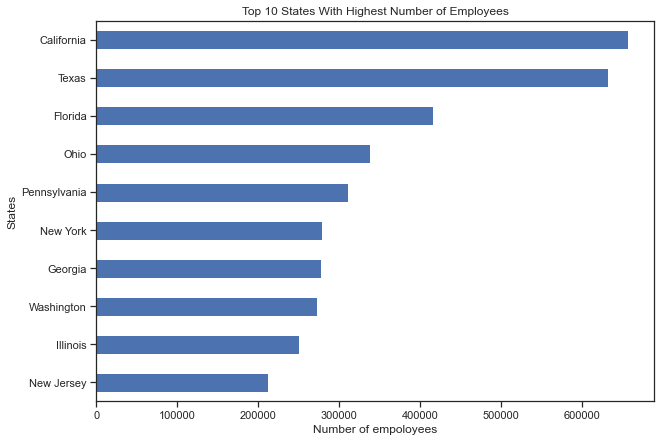

In [27]:
#creating a graph of the states with the highest number of employees
ax = emp_state[:10].plot(x='NAME', kind="barh")
sns.set(style="white")
plt.title('Top 10 States With Highest Number of Employees')
plt.xlabel('Number of empoloyees')
plt.ylabel('States')
plt.gca().invert_yaxis()
plt.show()

In [28]:
#viewing the previous dataset, but now  in terms of robotics use
emp_state_tech = robots_data[['EMP', 'NAME', 'TECHUSE']]

emp_state_tech = emp_state_tech.groupby(['NAME', 'TECHUSE'])['EMP'].max()

emp_state_tech = emp_state_tech.sort_values(ascending=False)

emp_state_tech.head()

NAME        TECHUSE               
California  Robotics: Low use         656349
Texas       Robotics: Low use         631922
California  Robotics: Moderate use    440398
Florida     Robotics: Low use         415909
Texas       Robotics: Moderate use    356403
Name: EMP, dtype: int32

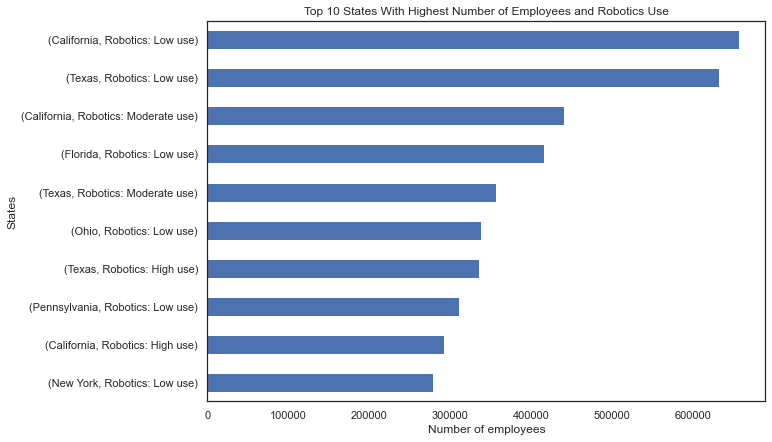

In [29]:
#viewing the data in a graph
ax = emp_state_tech[:10].plot(x='NAME', kind="barh")
sns.set(style="white")
plt.title('Top 10 States With Highest Number of Employees and Robotics Use')
plt.xlabel('Number of employees')
plt.ylabel('States')
plt.gca().invert_yaxis()
plt.show()

In [30]:
#looking at the states with the lowest number of listed employees at a firm
emp_tech_min = robots_data[['EMP', 'NAME', 'TECHUSE']]

emp_tech_min = emp_tech_min.groupby(['NAME'])['EMP'].agg('min')

emp_tech_min = emp_tech_min.sort_values(ascending=True)

emp_tech_min.head()

NAME
Alaska                     0
District of Columbia    2754
Vermont                 3345
Wyoming                 4026
Maine                   4442
Name: EMP, dtype: int32

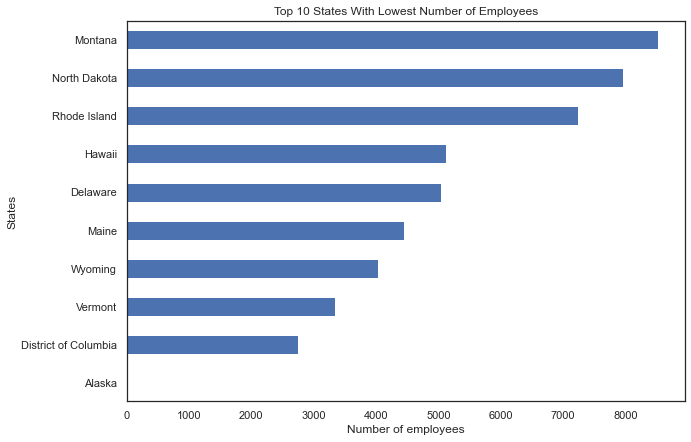

In [31]:
#viewing the data in a graph
ax = emp_tech_min[:10].plot(x='NAME', kind="barh")
sns.set(style="white")
plt.title('Top 10 States With Lowest Number of Employees')
plt.xlabel('Number of employees')
plt.ylabel('States')
plt.show()

In [32]:
#viewing the data of the states with the lowest number of listed employees in terms of robotics use.
emp_state_tech_min = robots_data[['EMP', 'NAME', 'TECHUSE']]

emp_state_tech_min = emp_state_tech_min.groupby(['NAME', 'TECHUSE'])['EMP'].min()

emp_state_tech_min = emp_state_tech_min.sort_values(ascending=True)

emp_state_tech_min.head()

NAME                  TECHUSE               
Alaska                Robotics: High use           0
District of Columbia  Robotics: High use        2754
Vermont               Robotics: Moderate use    3345
                      Robotics: High use        3563
Wyoming               Robotics: Moderate use    4026
Name: EMP, dtype: int32

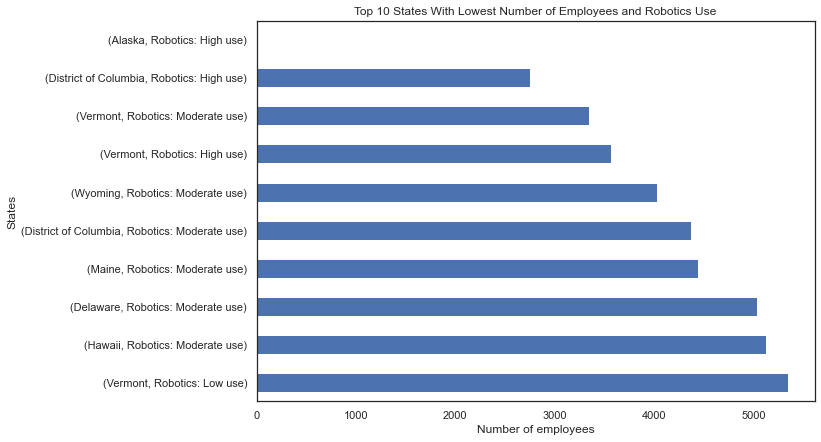

In [33]:
#Looking at the data in graph form
ax = emp_state_tech_min[:10].plot(x='NAME', kind="barh")
sns.set(style="white")
plt.title('Top 10 States With Lowest Number of Employees and Robotics Use')
plt.xlabel('Number of employees')
plt.ylabel('States')
plt.gca().invert_yaxis()
plt.show()

In [34]:
#Final view of the data only in terms of robotics use and average number of employees at a firm
emp_high_tech = robots_data[['EMP', 'TECHUSE']]

emp_high_tech = emp_high_tech.groupby('TECHUSE')['EMP'].mean()

emp_high_tech = emp_high_tech.sort_values(ascending=False)

emp_high_tech.head()

TECHUSE
Robotics: Low use         131501.843137
Robotics: Moderate use     81219.784314
Robotics: High use         76237.196078
Name: EMP, dtype: float64

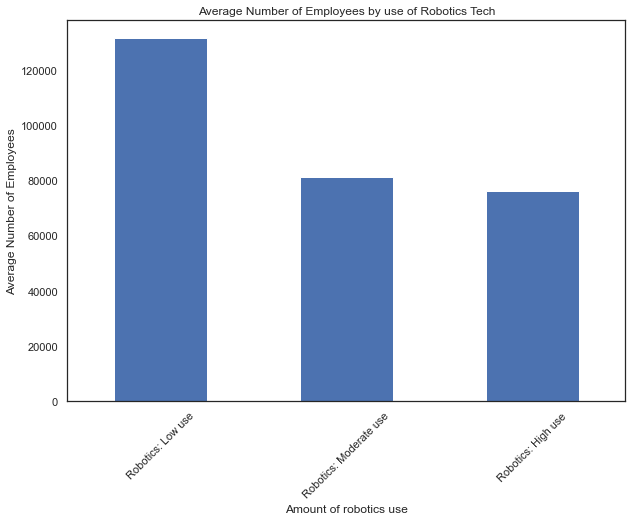

In [35]:
#Graph of above data
ax = emp_high_tech[:10].plot(x='TECHUSE', kind="bar")
sns.set(style="white")
plt.title('Average Number of Employees by use of Robotics Tech')
plt.xlabel('Amount of robotics use')
plt.ylabel('Average Number of Employees')
plt.xticks(rotation=45)
plt.show()

## Jared's Code

In [67]:
# imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Formatting API Request

We need the url of the website - which is clear from the website; we also have to specify the year - which is 2018 - and we need to specify the exact dataset we need, which is 'abstcb'. To change the dataset, we would change the tech_dataset variable.

The tech_url is just combining these variables above together so we can properly call the API.

Here, we want to grab the data that we need. We really just want the state name (NAME), ethnic group (ETH_GROUP), ethnic group label (ETH_GROUP_LABEL), employee count (EMP), and factors adversely affecting technology production(FACTORS_P), and motivation for technology use (MOTUSETECH). The tech predicates are the specifications of what we're looking for. The 'get' values are simply the columns that we need, the 'for' value clarifies that we're looking for the state information, not the United States per se. For this matter, we could theoretically use the US data because we don't absolutely need the states for this part, but it doesn't really matter.

The tech_response is the actual request, the object returned when we call the API.


In [68]:
tech_url = 'https://api.census.gov/data'
tech_year = '2018'
tech_dataset = 'abstcb' # CHANGE THIS TO CHANGE DATASET

tech_url = '/'.join([tech_url, tech_year, tech_dataset])

# FORMATTING API REQUEST

tech_predicates = {}
get_vars = ['NAME', 'ETH_GROUP', 'ETH_GROUP_LABEL', 'EMP', 'FACTORS_P', 'FACTORS_P_LABEL', 'MOTUSETECH'] # CHANGE THIS TO CHANGE VARIABLES RECEIVED
tech_predicates['get'] = ','.join(get_vars)
tech_predicates['for'] = 'state:*' # CHANGE THIS TO CHANGE GEOGRAPHIC SCOPE
tech_predicates['key'] = '7c2c8ae1aefce7823680175cfa25d0ba300fe6f5' # DON'T CHANGE THIS
tech_response = requests.get(tech_url, params=tech_predicates)

This part below is pretty simple; we're turning the request into a json object, then turning it into an object. Notice that the columns is the first value of the JSON object while the data is everything else.

In [69]:
tech_json = tech_response.json()
tech_columns = tech_json[0]

tech_df = pd.DataFrame(columns = tech_columns, data = tech_json[1:])

Now we're getting into the really dirty work, but it's pretty simple after the first run; we're going to repeat the same process so the main explanation will take place here and we'll only explain any changes as they come up.

First, let's fix up the tech_df object by cleaning it as we need. We don't want FACTORS_P_LABEL to have All firms, so we'll git rid of that. NextFor control sake, we will also only use data where ETH_GROUP_LABEL is total, as opposed to each group. We don't want this segmented further than it needs to be.

Next, we need to transform the EMP column into an column full of integers so we can actually do a mean calculation on it.

Finally, let's group the variable by FACTORS_P_LABEL and have it summarize EMP as mean, so we're getting the average EMP by FACTOR_P_LABEL. Notice that we include that "as_index = False" portion; this will help us later when we want to access only certain parts of the columns. Please include that.

In [70]:
tech_df_fixed = tech_df[tech_df['FACTORS_P_LABEL'] != 'All firms']
tech_df_fixed = tech_df_fixed[tech_df_fixed['ETH_GROUP_LABEL'] == 'Total']
tech_df_fixed['EMP'] = tech_df_fixed['EMP'].astype('int32')
tech_df_factor_grouped = tech_df_fixed.groupby('FACTORS_P_LABEL', as_index = False)['EMP'].mean()

Now that we've grouped everything together, we want to focus on the AI portion of the data. We only want to grab the tech_df_AI[0:10] because that's the segment of the data that is only AI. Now that we've selected this data, we want to filter out what we don't need. Specifically, we don't want data that says the required data wasn't available, there were no factors adversely affecting the adoption of AI, and we finally we don't need any AI data where the technology is not applicable to the business.

After that, we make our own variable that includes the FACTORS_P_LABEL column - past the words "Artificial Intelligence:", as that would be redundant. We want to replace a few of those values in that variable so it looks cleaner for the graph. We also make a variable that includes all of the EMP info.

After that, it's very simple. Just use the variables that contain column data as the x and y values to build a horizontal bar graph, then add an x-label, y-label, and a title. That "ticklabel_format" line is there to get the data out of scientific notation.

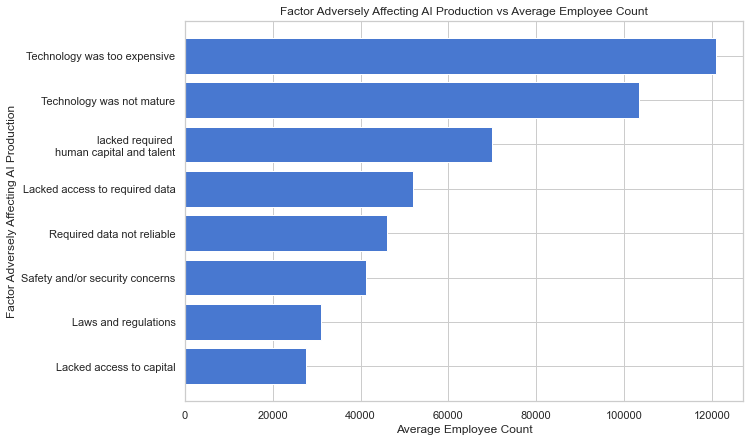

In [71]:
tech_df_AI = tech_df_factor_grouped[0:10]
tech_df_AI = tech_df_AI[tech_df_AI['FACTORS_P_LABEL'] != 'Artificial Intelligence: Technology not applicable to this business']
tech_df_AI = tech_df_AI[tech_df_AI['FACTORS_P_LABEL'] != 'Artificial Intelligence: No factors adversely affected the adoption of this technology']
tech_df_AI = tech_df_AI.sort_values(by = 'EMP', ascending = False)
factors_p_label = tech_df_AI['FACTORS_P_LABEL'].str[25:]
factors_p_label = factors_p_label.replace('Concerns regarding safety and security (physical security and/or cyber security)', 
'Safety and/or security concerns')
factors_p_label = factors_p_label.replace('Lacked access to required human capital and talent', 'lacked required \n human capital and talent')
emp_info = tech_df_AI['EMP']

tech_df_AI_plot = plt.barh(factors_p_label, emp_info)
tech_df_AI_plot = plt.xlabel('Average Employee Count')
tech_df_AI_plot = plt.ylabel('Factor Adversely Affecting AI Production')
tech_df_AI_plot = plt.ticklabel_format(style = 'plain', axis = 'x')
tech_df_AI_plot = plt.title('Factor Adversely Affecting AI Production vs Average Employee Count')
tech_df_AI_plot = plt.gca().invert_yaxis(); 

Repeat the same process as above, but with some modifications. The cleaning now is about robotics as opposed to AI, so the subsection of the grouped-data will be 22:32, and we only need the string past 10 for the FACTORS_P_LABEL column, cutting out the word "robotics:". Change the variable names to match robotics, and everything else should be very similar.

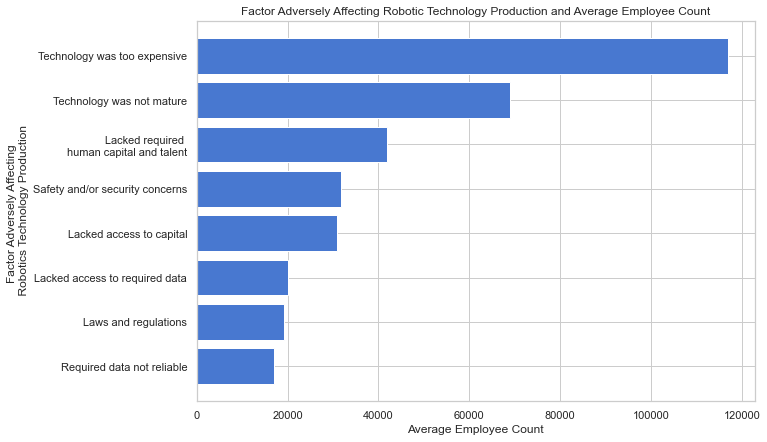

In [72]:
tech_df_robotics = tech_df_factor_grouped[22:32]
tech_df_robotics = tech_df_robotics[tech_df_robotics['FACTORS_P_LABEL'] != 'Robotics: Technology not applicable to this business']
tech_df_robotics = tech_df_robotics[tech_df_robotics['FACTORS_P_LABEL'] != 'Robotics: No factors adversely affected the adoption of this technology']
tech_df_robotics = tech_df_robotics.sort_values(by = 'EMP', ascending = False)
factors_p_label_robotics = tech_df_robotics['FACTORS_P_LABEL'].str[10:]
factors_p_label_robotics = factors_p_label_robotics.replace('Concerns regarding safety and security (physical security and/or cyber security)', 
'Safety and/or security concerns')
factors_p_label_robotics = factors_p_label_robotics.replace('Lacked access to required human capital and talent', 'Lacked required \n human capital and talent')
robotics_emp_info = tech_df_robotics['EMP']

tech_df_robotics_plot = plt.barh(factors_p_label_robotics, robotics_emp_info)
tech_df_robotics_plot = plt.xlabel('Average Employee Count')
tech_df_robotics_plot = plt.ylabel('Factor Adversely Affecting \n Robotics Technology Production')
tech_df_robotics_plot = plt.title('Factor Adversely Affecting Robotic Technology Production and Average Employee Count')
tech_df_robotics_plot = plt.ticklabel_format(style = 'plain', axis = 'x')
tech_df_robotics_plot = plt.gca().invert_yaxis()

Now we're onto working with the MOTUSETECH data, which covers the motivation for having certain technology. As the documentation for the data shows, the first two characters of the "MOTUSETECH" column clarify the type of technology. In this case, T4 is robot technology, so we only want data where the first two characters of MOTUSETECH is T4. Next, we want to control the ETH_GROUP_LABEL so it only includes "Total" as opposed to segmenting by ethnicity group. As before, we want to change the EMP column into a column with integers. Finally, we group the data by MOTUSETECH, summarizing the EMP data by mean. We also have the "as_index = False" parameter so we can work with the data more easily.

In [73]:
tech_df_motusetech_robot = tech_df[tech_df['MOTUSETECH'].str[0:2] == 'T4']
tech_df_motusetech_robot = tech_df_motusetech_robot[tech_df_motusetech_robot['ETH_GROUP_LABEL'] == 'Total']
tech_df_motusetech_robot['EMP'] = tech_df_motusetech_robot['EMP'].astype('int32')
tech_df_motusetech_robot_grouped = tech_df_motusetech_robot.groupby('MOTUSETECH', as_index = False)['EMP'].mean()
tech_df_motusetech_robot_grouped = tech_df_motusetech_robot_grouped.sort_values(by = 'EMP', ascending = True)

First, we only need the data from 0:6 because the final value is the total; store that in a new variable so we can later use it in the plot. From there, we just want to change the names of the data to match the data labels, as to not confuse the reader.

Do the same with the EMP column, but don't change any of the data.

From there, plot the graph with the following specified: xlabel, ylabel, and title. Also specify the color so it doesn't come out multi-colored.

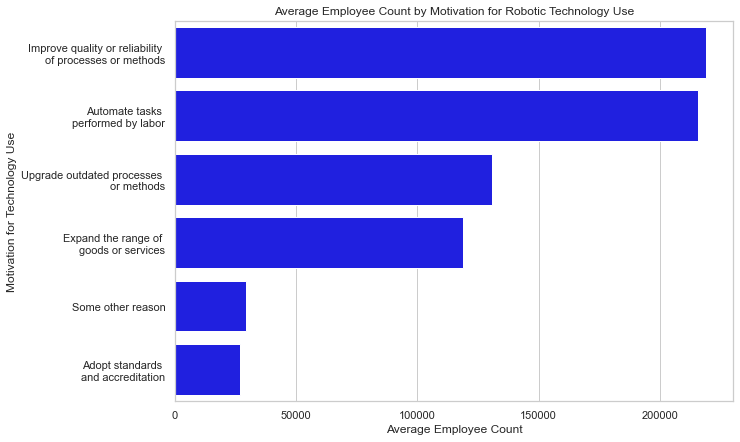

In [74]:
tech_df_motusetech_robot_reason = tech_df_motusetech_robot_grouped['MOTUSETECH'][0:6]
tech_df_motusetech_robot_reason = tech_df_motusetech_robot_reason.replace('T4E13C01', 'Automate tasks \n performed by labor')
tech_df_motusetech_robot_reason = tech_df_motusetech_robot_reason.replace('T4E13C02', 'Upgrade outdated processes \n or methods')
tech_df_motusetech_robot_reason = tech_df_motusetech_robot_reason.replace('T4E13C03', 'Improve quality or reliability \n of processes or methods')
tech_df_motusetech_robot_reason = tech_df_motusetech_robot_reason.replace('T4E13C04', 'Expand the range of \n goods or services')
tech_df_motusetech_robot_reason = tech_df_motusetech_robot_reason.replace('T4E13C05', 'Adopt standards \n and accreditation')
tech_df_motusetech_robot_reason = tech_df_motusetech_robot_reason.replace('T4E13C06', 'Some other reason')

tech_df_robot_emp = tech_df_motusetech_robot_grouped['EMP'][0:6]
tech_df_robot_emp

tech_df_motusetech_plot = sns.barplot(x = tech_df_robot_emp, y = tech_df_motusetech_robot_reason, color = 'Blue').set(xlabel = 'Average Employee Count',
ylabel = 'Motivation for Technology Use',
title = 'Average Employee Count by Motivation for Robotic Technology Use')
tech_df_motusetech_plot = plt.gca().invert_yaxis(); 

Now we're going to create the AI data. Do everything the same as when creating the robot data, but change it so the data found has 'T1' as the two first characters and name the variables as AI rather than robot.

In [75]:
tech_df_motusetech_ai = tech_df[tech_df['MOTUSETECH'].str[0:2] == 'T1']
tech_df_motusetech_ai = tech_df_motusetech_ai[tech_df_motusetech_ai['ETH_GROUP_LABEL'] == 'Total']
tech_df_motusetech_ai['EMP'] = tech_df_motusetech_ai['EMP'].astype('int32')
tech_df_motusetech_ai_grouped = tech_df_motusetech_ai.groupby('MOTUSETECH', as_index = False)['EMP'].mean()
tech_df_motusetech_ai_grouped = tech_df_motusetech_ai_grouped.sort_values(by = 'EMP', ascending = False)

Again, do the same as everything in the robot data, but change it to match the AI data. It's almost all the same.

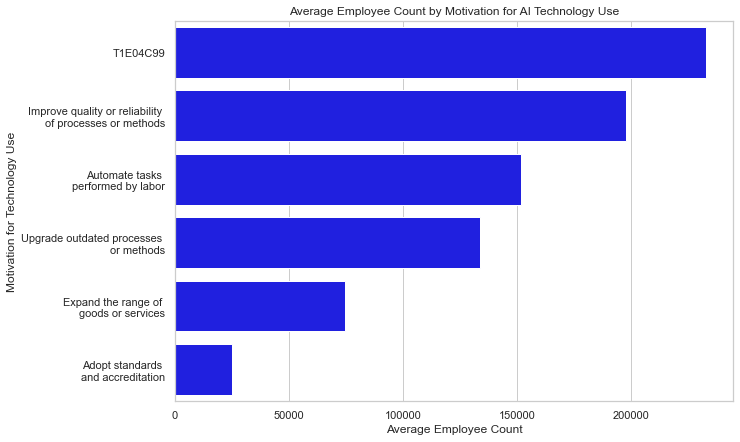

In [76]:
tech_df_motusetech_ai_reason = tech_df_motusetech_ai_grouped['MOTUSETECH'][0:6]
tech_df_motusetech_ai_reason = tech_df_motusetech_ai_reason.replace('T1E04C01', 'Automate tasks \n performed by labor')
tech_df_motusetech_ai_reason = tech_df_motusetech_ai_reason.replace('T1E04C02', 'Upgrade outdated processes \n or methods')
tech_df_motusetech_ai_reason = tech_df_motusetech_ai_reason.replace('T1E04C03', 'Improve quality or reliability \n of processes or methods')
tech_df_motusetech_ai_reason = tech_df_motusetech_ai_reason.replace('T1E04C04', 'Expand the range of \n goods or services')
tech_df_motusetech_ai_reason = tech_df_motusetech_ai_reason.replace('T1E04C05', 'Adopt standards \n and accreditation')
tech_df_motusetech_ai_reason = tech_df_motusetech_ai_reason.replace('T1E04C06', 'Some other reason')

tech_df_robot_emp = tech_df_motusetech_ai_grouped['EMP'][0:6]
tech_df_robot_emp

sns.barplot(x = tech_df_robot_emp, y = tech_df_motusetech_ai_reason, color = 'Blue').set(xlabel = 'Average Employee Count',
ylabel = 'Motivation for Technology Use',
title = 'Average Employee Count by Motivation for AI Technology Use'); 

## Charlie's Code

In [37]:
# imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Below, we build an API call to the official US Census Bureau Buisness Survey API. Target fields are specified in a list of variables and data is taken at a national level as opposed to a more specific geographic scope. This call only queries the Technology Characteristics of Businesses dataset but could be modified to query from any of the available datasets.

In [36]:
# BUILDING BASE URL
url = 'https://api.census.gov/data'
year = '2018'
dataset = 'abstcb' # CHANGE THIS TO CHANGE DATASET
base_url = '/'.join([url, year, dataset])

# FORMATTING API REQUEST
predicates = {}
get_vars = ['FACTORS_P', 'FACTORS_P_LABEL', 'PAYANN', 'FIRMPDEMP', 'EMP', 'RCPPDEMP', 'IMPACTWK_P', 'IMPACTWK_P_LABEL', 'TECHSELL', 'TECHSELL_LABEL'] # CHANGE THIS TO CHANGE VARIABLES RECEIVED
predicates['get'] = ','.join(get_vars)
predicates['for'] = 'us:*' # CHANGE THIS TO CHANGE GEOGRAPHIC SCOPE
predicates['key'] = '7c2c8ae1aefce7823680175cfa25d0ba300fe6f5' # DON'T CHANGE THIS
response = requests.get(base_url, params=predicates)
response.status_code

200

In [38]:
# BUILDING BASE URL
url = 'https://api.census.gov/data'
year = '2018'
dataset = 'abstcb' # CHANGE THIS TO CHANGE DATASET
base_url = '/'.join([url, year, dataset])

# FORMATTING API REQUEST
predicates = {}
get_vars = ['FACTORS_P', 'FACTORS_P_LABEL', 'PAYANN', 'FIRMPDEMP', 'EMP', 'RCPPDEMP', 'IMPACTWK_P', 'IMPACTWK_P_LABEL', 'TECHSELL', 'TECHSELL_LABEL'] # CHANGE THIS TO CHANGE VARIABLES RECEIVED
predicates['get'] = ','.join(get_vars)
predicates['for'] = 'us:*' # CHANGE THIS TO CHANGE GEOGRAPHIC SCOPE
predicates['key'] = '7c2c8ae1aefce7823680175cfa25d0ba300fe6f5' # DON'T CHANGE THIS
response = requests.get(base_url, params=predicates)
response.status_code

200

Below we convert the raw JSON returned by the API to a pandas dataframe to make it easier to manipulate and visualize later on.

In [39]:
resp_json = response.json()
data = pd.DataFrame(resp_json[1:], columns=resp_json[0])

After getting the necessary fields from the API, notice that every column stored as an object despite the PAYANN, RCPPDEMP, EMP and FIRMPDEMP fields being numeric.

In [40]:
# NOTE THAT EVEN THE NUMERIC DATA VALUES ARE OBJECTS
data.dtypes

FACTORS_P           object
FACTORS_P_LABEL     object
PAYANN              object
FIRMPDEMP           object
EMP                 object
RCPPDEMP            object
IMPACTWK_P          object
IMPACTWK_P_LABEL    object
TECHSELL            object
TECHSELL_LABEL      object
us                  object
dtype: object

These fields will be easier to work with if they're stored as integers so we can convert each to an integer using astype.

In [46]:
data['PAYANN'] = data['PAYANN'].astype('int64')
data['RCPPDEMP'] = data['RCPPDEMP'].astype('int64')
data['EMP'] = data['EMP'].astype('int64')
data['FIRMPDEMP'] = data['FIRMPDEMP'].astype('int64')

The data will also be easier to filter and visualize if we can separate it by question category easier. To do this, we can parse out the first two values in each code to isolate the category, then match each category code to a more verbose label.

In [47]:
# CREATE CATEGORY COLUMNS FOR EACH CATEGORY OF SURVEY QUESTION
data['FACTORS_P_CAT'] = data['FACTORS_P'].apply(lambda x : x[:2])
data['IMPACTWK_P_CAT'] = data['IMPACTWK_P'].apply(lambda x : x[:2])
data['TECHSELL_CAT'] = data['TECHSELL'].apply(lambda x : x[:2])

In [48]:
# MAP SUB-CODES TO THEIR OWN LABELS
map_dict = {'00' : 'None', 'T1' : 'Artificial Intelligence', 'T2' : 'Cloud-Based', 'T3' : 'Specialized Software', 'T4' : 'Robotics' , 'T5' : 'Specialized Equipment' }
data['FACTORS_P_CAT_LABEL'] = data['FACTORS_P_CAT'].map(map_dict)
data['IMPACTWK_P_CAT_LABEL'] = data['IMPACTWK_P_CAT'].map(map_dict)
data['TECHSELL_CAT_LABEL'] = data['TECHSELL_CAT'].map(map_dict)

In [49]:
data.shape

(160, 17)

In [50]:
data.IMPACTWK_P_LABEL.value_counts()

All firms                                                                                75
Robotics: Did not change number of production workers employed by this business           1
Robotics: Did not change number of supervisory workers employed by this business          1
Robotics: Decreased number of supervisory workers employed by this business               1
Robotics: Increased number of supervisory workers employed by this business               1
                                                                                         ..
Cloud-Based: Decreased number of supervisory workers employed by this business            1
Cloud-Based: Increased number of supervisory workers employed by this business            1
Cloud-Based: Not applicable, did not employ nonproduction workers                         1
Cloud-Based: Did not change number of nonproduction workers employed by this business     1
Specialized Equipment: Total Reporting                                          

In [51]:
data.FACTORS_P_LABEL.value_counts()

All firms                                                                                                    105
Cloud-Based: Lacked access to capital                                                                          1
Cloud-Based: Technology not applicable to this business                                                        1
Specialized Equipment: Lacked access to required human capital and talent                                      1
Specialized Equipment: Laws and regulations                                                                    1
Specialized Equipment: Concerns regarding safety and security (physical security and/or cyber security)        1
Specialized Equipment: Lacked access to capital                                                                1
Specialized Equipment: Technology not applicable to this business                                              1
Specialized Equipment: No factors adversely affected the adoption of this technology            

In [52]:
data.TECHSELL_LABEL.value_counts()

All firms                                   140
Cloud-Based: No                               1
Robotics: No                                  1
Robotics: Yes                                 1
Specialized Software: Total Reporting         1
Specialized Software: Don't know              1
Specialized Software: No                      1
Specialized Software: Yes                     1
Cloud-Based: Total Reporting                  1
Cloud-Based: Don't know                       1
Cloud-Based: Yes                              1
Robotics: Total Reporting                     1
Artificial Intelligence: Total Reporting      1
Artificial Intelligence: Don't know           1
Artificial Intelligence: No                   1
Artificial Intelligence: Yes                  1
Specialized Equipment: Total Reporting        1
Specialized Equipment: Don't know             1
Specialized Equipment: No                     1
Specialized Equipment: Yes                    1
Robotics: Don't know                    

Looking at each of my target fields, you'll notice that each specific question only has one entry meaning that there is no overlap between survey questions.

In [53]:
factors_payann = data[(data['IMPACTWK_P'] == '00') & (data['TECHSELL'] == '00') & ((data['FACTORS_P_CAT'] == 'T1') | (data['FACTORS_P_CAT'] == 'T4'))]
factors_payann.head()

,FACTORS_P,FACTORS_P_LABEL,PAYANN,FIRMPDEMP,EMP,RCPPDEMP,IMPACTWK_P,IMPACTWK_P_LABEL,TECHSELL,TECHSELL_LABEL,us,FACTORS_P_CAT,IMPACTWK_P_CAT,TECHSELL_CAT,FACTORS_P_CAT_LABEL,IMPACTWK_P_CAT_LABEL,TECHSELL_CAT_LABEL
15,T4E36R01,Robotics: Technology was too expensive,315819401,254278,5965365,2130450162,00,All firms,00,All firms,1,T4,00,00,Robotics,None,None
16,T4E36R02,Robotics: Technology was not mature,223016254,27670,3520407,1679032308,00,All firms,00,All firms,1,T4,00,00,Robotics,None,None
17,T4E36R03,Robotics: Lacked access to required data,81507070,14799,1039815,797524792,00,All firms,00,All firms,1,T4,00,00,Robotics,None,None
18,T4E36R04,Robotics: Required data not reliable,72116660,9020,890080,786568367,00,All firms,00,All firms,1,T4,00,00,Robotics,None,None
19,T4E36R05,Robotics: Lacked access to required human capi...,157952192,24077,2133315,1373196193,00,All firms,00,All firms,1,T4,00,00,Robotics,None,None


In [54]:
sorted_factors_payann = factors_payann.sort_values('FIRMPDEMP', ascending=False)
sorted_factors_payann.head()

,FACTORS_P,FACTORS_P_LABEL,PAYANN,FIRMPDEMP,EMP,RCPPDEMP,IMPACTWK_P,IMPACTWK_P_LABEL,TECHSELL,TECHSELL_LABEL,us,FACTORS_P_CAT,IMPACTWK_P_CAT,TECHSELL_CAT,FACTORS_P_CAT_LABEL,IMPACTWK_P_CAT_LABEL,TECHSELL_CAT_LABEL
80,T1E36R99,Artificial Intelligence: Total Reporting,5040956336,4747916,94021639,29863957288,00,All firms,00,All firms,1,T1,00,00,Artificial Intelligence,None,None
25,T4E36R99,Robotics: Total Reporting,5002363293,4734415,93526647,29629676057,00,All firms,00,All firms,1,T4,00,00,Robotics,None,None
23,T4E36R09,Robotics: Technology not applicable to this bu...,2026516860,2372042,41428304,11353752814,00,All firms,00,All firms,1,T4,00,00,Robotics,None,None
78,T1E36R09,Artificial Intelligence: Technology not applic...,1918663667,2314998,40513344,11012317863,00,All firms,00,All firms,1,T1,00,00,Artificial Intelligence,None,None
79,T1E36R10,Artificial Intelligence: No factors adversely ...,2478117205,2082111,43330108,14769080544,00,All firms,00,All firms,1,T1,00,00,Artificial Intelligence,None,None


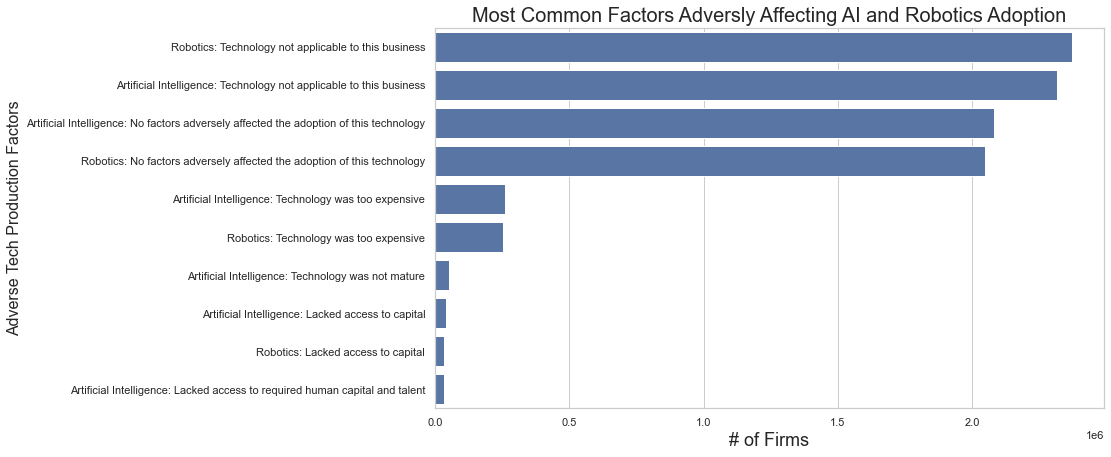

In [55]:
plt.figure(figsize=(12,7))
sns.set_theme(style='whitegrid', palette='tab10')
ax = sns.barplot(x='FIRMPDEMP', 
                 y='FACTORS_P_LABEL',
                 data=sorted_factors_payann[2:12], 
                 orient='h',
                 color='b',
                )
ax.set_xlabel('# of Firms', size=18)
ax.set_ylabel('Adverse Tech Production Factors', size=16)
ax.set_title('Most Common Factors Adversly Affecting AI and Robotics Adoption', size=20);

In [56]:
fig = ax.get_figure()
fig.savefig("FACTORS.png") 

In [57]:
impact_payann = data[(data['FACTORS_P'] == '00') & (data['TECHSELL'] == '00') & ((data['IMPACTWK_P_CAT'] == 'T1') | (data['IMPACTWK_P_CAT'] == 'T4'))]
impact_payann.head()

,FACTORS_P,FACTORS_P_LABEL,PAYANN,FIRMPDEMP,EMP,RCPPDEMP,IMPACTWK_P,IMPACTWK_P_LABEL,TECHSELL,TECHSELL_LABEL,us,FACTORS_P_CAT,IMPACTWK_P_CAT,TECHSELL_CAT,FACTORS_P_CAT_LABEL,IMPACTWK_P_CAT_LABEL,TECHSELL_CAT_LABEL
37,00,All firms,53596486,3162,415685,209262261,T1E23M01,Artificial Intelligence: Increased number of p...,00,All firms,1,00,T1,00,None,Artificial Intelligence,None
38,00,All firms,1845988,543,21969,5807248,T1E23M02,Artificial Intelligence: Decreased number of p...,00,All firms,1,00,T1,00,None,Artificial Intelligence,None
39,00,All firms,73693805,10078,770843,414005712,T1E23M03,Artificial Intelligence: Did not change number...,00,All firms,1,00,T1,00,None,Artificial Intelligence,None
40,00,All firms,122073097,6004,864394,587702571,T1E23M04,"Artificial Intelligence: Not applicable, did n...",00,All firms,1,00,T1,00,None,Artificial Intelligence,None
41,00,All firms,81192381,2622,558122,252889376,T1E23N05,Artificial Intelligence: Increased number of n...,00,All firms,1,00,T1,00,None,Artificial Intelligence,None


In [58]:
sorted_impact_payann = impact_payann.sort_values('FIRMPDEMP', ascending=True)
sorted_impact_payann.head()

,FACTORS_P,FACTORS_P_LABEL,PAYANN,FIRMPDEMP,EMP,RCPPDEMP,IMPACTWK_P,IMPACTWK_P_LABEL,TECHSELL,TECHSELL_LABEL,us,FACTORS_P_CAT,IMPACTWK_P_CAT,TECHSELL_CAT,FACTORS_P_CAT_LABEL,IMPACTWK_P_CAT_LABEL,TECHSELL_CAT_LABEL
119,00,All firms,8943167,315,87098,32997226,T4E32P14,Robotics: Decreased number of nonsupervisory w...,00,All firms,1,00,T4,00,None,Robotics,None
46,00,All firms,5771728,398,60478,23236509,T1E23O10,Artificial Intelligence: Decreased number of s...,00,All firms,1,00,T1,00,None,Artificial Intelligence,None
111,00,All firms,8565069,494,87984,28458280,T4E32N06,Robotics: Decreased number of nonproduction wo...,00,All firms,1,00,T4,00,None,Robotics,None
38,00,All firms,1845988,543,21969,5807248,T1E23M02,Artificial Intelligence: Decreased number of p...,00,All firms,1,00,T1,00,None,Artificial Intelligence,None
115,00,All firms,6686342,551,74547,28508126,T4E32O10,Robotics: Decreased number of supervisory work...,00,All firms,1,00,T4,00,None,Robotics,None


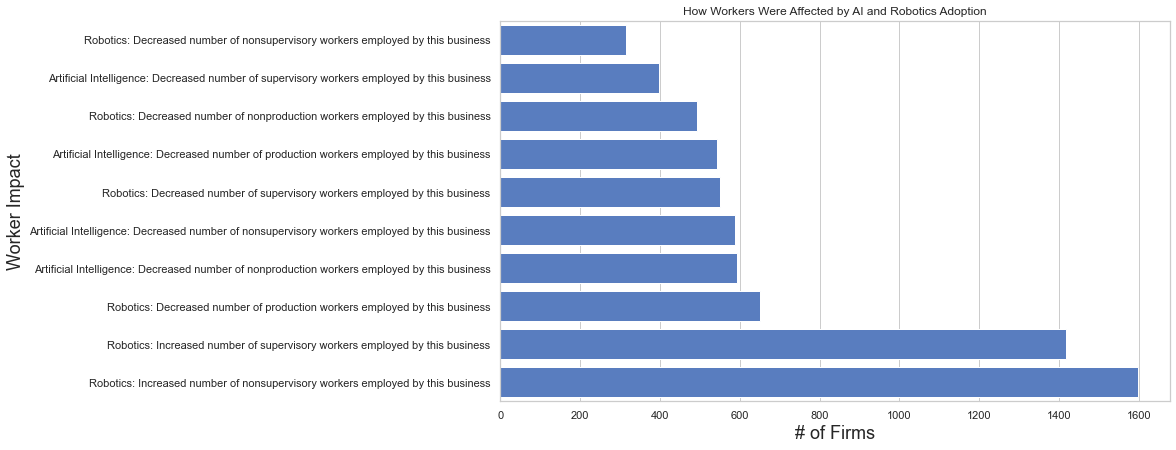

In [59]:
plt.figure(figsize=(12,7))
sns.set_theme(style='whitegrid', palette='muted')
ax = sns.barplot(x='FIRMPDEMP', 
                 y='IMPACTWK_P_LABEL',
                 data=sorted_impact_payann[0:10], 
                 orient='h',
                 color='b'
                )
ax.set_xlabel('# of Firms', size=18)
ax.set_ylabel('Worker Impact', size=18)
ax.set_title('How Workers Were Affected by AI and Robotics Adoption');

In [60]:
fig = ax.get_figure()
fig.savefig("TOP_IMPACT.png") 

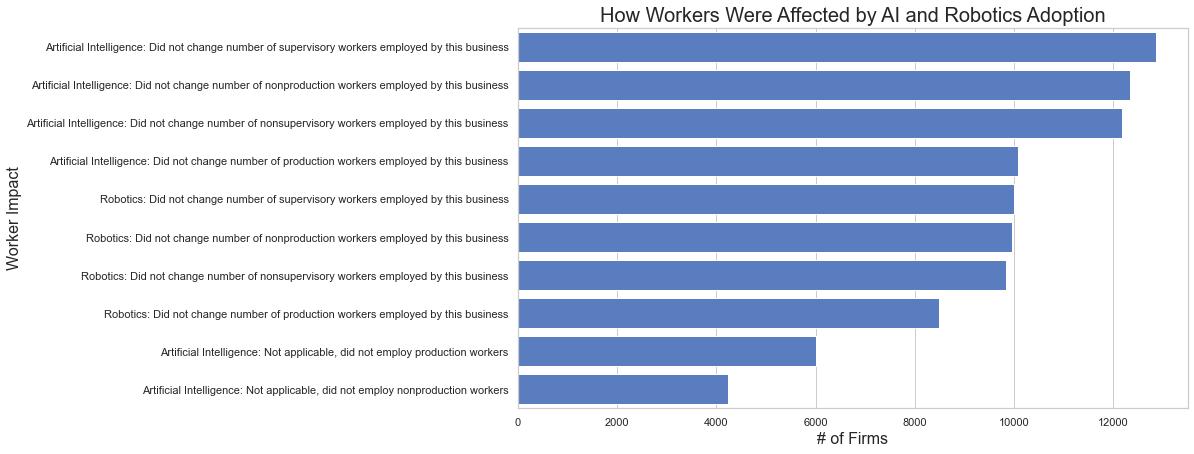

In [61]:
sorted_impact_payann = impact_payann.sort_values('FIRMPDEMP', ascending=False)

plt.figure(figsize=(12,7))
sns.set_theme(style='whitegrid', palette='muted')
ax = sns.barplot(x='FIRMPDEMP', 
                 y='IMPACTWK_P_LABEL',
                 data=sorted_impact_payann[2:12], 
                 orient='h',
                 color='b'
                )
ax.set_xlabel('# of Firms', size=16)
ax.set_ylabel('Worker Impact', size=16)
ax.set_title('How Workers Were Affected by AI and Robotics Adoption', size=20);

In [62]:
fig = ax.get_figure()
fig.savefig("BOT_IMPACT.png") 

In [63]:
techsell_payann = data[(data['FACTORS_P'] == '00') & (data['IMPACTWK_P'] == '00') & ((data['TECHSELL_CAT'] == 'T1') | (data['TECHSELL_CAT'] == 'T4'))]
techsell_payann.head()

,FACTORS_P,FACTORS_P_LABEL,PAYANN,FIRMPDEMP,EMP,RCPPDEMP,IMPACTWK_P,IMPACTWK_P_LABEL,TECHSELL,TECHSELL_LABEL,us,FACTORS_P_CAT,IMPACTWK_P_CAT,TECHSELL_CAT,FACTORS_P_CAT_LABEL,IMPACTWK_P_CAT_LABEL,TECHSELL_CAT_LABEL
140,00,All firms,5175488227,4771493,95157753,30515738514,00,All firms,T4E20J99,Robotics: Total Reporting,1,00,00,T4,None,None,Robotics
145,00,All firms,251209377,19789,2072891,1216777793,00,All firms,T1E20J01,Artificial Intelligence: Yes,1,00,00,T1,None,None,Artificial Intelligence
146,00,All firms,4053366902,4470228,81033834,23906538124,00,All firms,T1E20J02,Artificial Intelligence: No,1,00,00,T1,None,None,Artificial Intelligence
147,00,All firms,857075582,250838,11755912,5319064924,00,All firms,T1E20J03,Artificial Intelligence: Don't know,1,00,00,T1,None,None,Artificial Intelligence
148,00,All firms,5161651861,4740857,94862637,30442380841,00,All firms,T1E20J99,Artificial Intelligence: Total Reporting,1,00,00,T1,None,None,Artificial Intelligence


In [64]:
sorted_techsell_payann = techsell_payann.sort_values('FIRMPDEMP', ascending=False)
sorted_techsell_payann.head()

,FACTORS_P,FACTORS_P_LABEL,PAYANN,FIRMPDEMP,EMP,RCPPDEMP,IMPACTWK_P,IMPACTWK_P_LABEL,TECHSELL,TECHSELL_LABEL,us,FACTORS_P_CAT,IMPACTWK_P_CAT,TECHSELL_CAT,FACTORS_P_CAT_LABEL,IMPACTWK_P_CAT_LABEL,TECHSELL_CAT_LABEL
140,00,All firms,5175488227,4771493,95157753,30515738514,00,All firms,T4E20J99,Robotics: Total Reporting,1,00,00,T4,None,None,Robotics
148,00,All firms,5161651861,4740857,94862637,30442380841,00,All firms,T1E20J99,Artificial Intelligence: Total Reporting,1,00,00,T1,None,None,Artificial Intelligence
158,00,All firms,4177872037,4520639,82157919,24237301929,00,All firms,T4E20J02,Robotics: No,1,00,00,T4,None,None,Robotics
146,00,All firms,4053366902,4470228,81033834,23906538124,00,All firms,T1E20J02,Artificial Intelligence: No,1,00,00,T1,None,None,Artificial Intelligence
147,00,All firms,857075582,250838,11755912,5319064924,00,All firms,T1E20J03,Artificial Intelligence: Don't know,1,00,00,T1,None,None,Artificial Intelligence


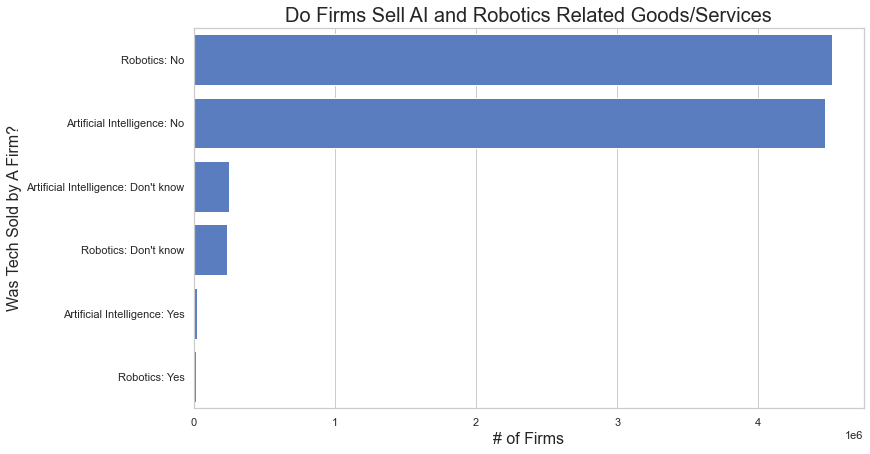

In [65]:
plt.figure(figsize=(12,7))
sns.set_theme(style='whitegrid', palette='muted')
ax = sns.barplot(x='FIRMPDEMP', 
                 y='TECHSELL_LABEL',
                 data=sorted_techsell_payann[2:], 
                 orient='h',
                 color='b'
                )
ax.set_xlabel('# of Firms', size=16)
ax.set_ylabel('Was Tech Sold by A Firm?', size=16)
ax.set_title('Do Firms Sell AI and Robotics Related Goods/Services', size=20);

In [66]:
fig = ax.get_figure()
fig.savefig("TECHSELL.png") 